In [71]:
import matplotlib.dates as mdates
from matplotlib import ticker
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pickle
import os.path
import googleapiclient
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

In [8]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']
SPREADSHEET_ID = ''
DATA_RANGE = 'TestData!A:C'

In [81]:
creds = None
# The file token.pickle stores the user's access and refresh tokens, and is
# created automatically when the authorization flow completes for the first
# time.
if os.path.exists('token.pickle'):
    with open('token.pickle', 'rb') as token:
        creds = pickle.load(token)
# If there are no (valid) credentials available, let the user log in.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            'credentials.json', SCOPES)
        creds = flow.run_local_server(port=0)
    # Save the credentials for the next run
    with open('token.pickle', 'wb') as token:
        pickle.dump(creds, token)

service = build('sheets', 'v4', credentials=creds)

In [42]:
sheet = service.spreadsheets()
result = sheet.values().get(spreadsheetId=SPREADSHEET_ID,
                            range=DATA_RANGE).execute()
values = result.get('values', [])

In [79]:
# Convert the sheet data into a useful numpy array
data = []
for i in values:
    date = datetime.strptime(i[0],'%Y-%m-%dT%H:%M:%S')
    data.append((date,float(i[1]),float(i[2])))
data = np.array(data)

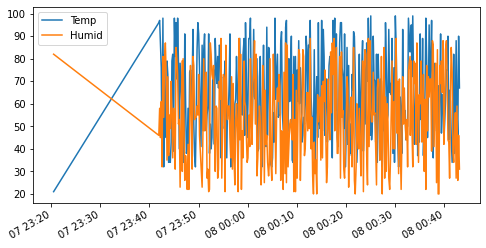

In [80]:
fig = plt.figure(figsize=(8,4))
plt.plot(data[:,0],data[:,1],label='Temp')
plt.plot(data[:,0],data[:,2],label='Humid')
plt.legend()
fig.autofmt_xdate()